# Mini Projeto - Machine Learning

## 3ª Etapa: Classificação completo de digitos - estratégia 1 contra todos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from linear_models import *
from utils import *

In [2]:
new_train_df = pd.read_csv('./dados/train_reduced.csv')
new_test_df = pd.read_csv('./dados/test_reduced.csv')

In [3]:
X_train = new_train_df[['intensidade', 'simetria']]
X_train = X_train.to_numpy()
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = new_test_df[['intensidade', 'simetria']]
X_test = X_test.to_numpy()
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

y_train = new_train_df['label']
y_train = y_train.to_numpy()

y_test = new_test_df['label']
y_test = y_test.to_numpy()

---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 0.9614
Error de Classificacao: 0.0386
_______________________________________________________
_______________________________________________________
Precision para digito 0: 1.0000
Recall para digito 0: 0.9495
F1 Score para digito 0: 0.9741
_______________________________________________________
_______________________________________________________
Precision para digito 1: 1.0000
Recall para digito 1: 1.0000
F1 Score para digito 1: 1.0000
_______________________________________________________
_______________________________________________________
Precision para digito 4: 0.9273
Recall para digito 4: 0.9745
F1 Score para digito 4: 0.9503
_______________________________________________________
_______________________________________________________
Precision para digito 5: 0.9336
Recall para digito 5: 0.9175
F1 Score para digito 5: 0.9255
___________

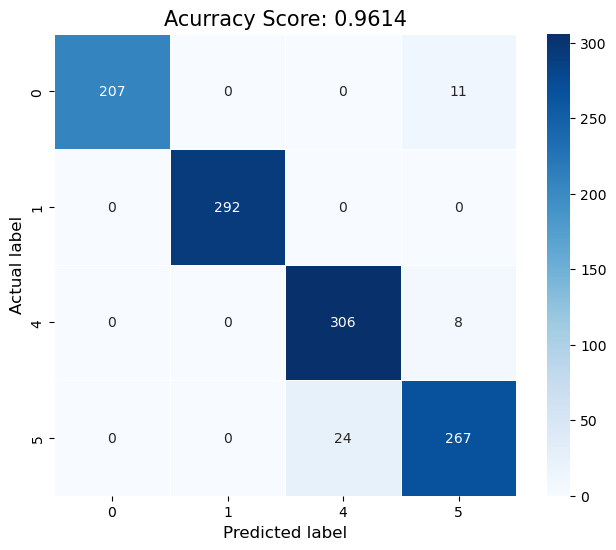

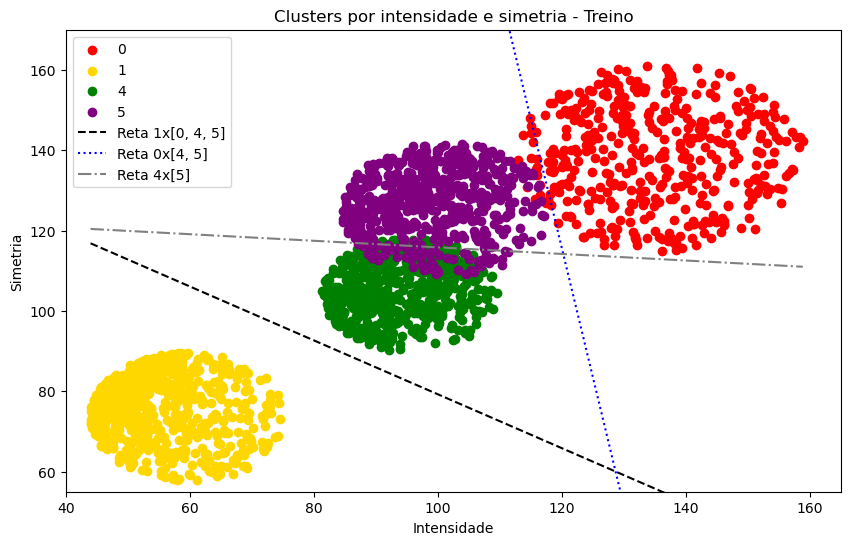

In [4]:
digitos = [0, 1, 4, 5]

lr = LinearRegression()

digitos = [1, 0, 4, 5]
modelo = Um_contra_todos(lr, digitos)
modelo.execute(X_train, y_train)
all_w = modelo.get_all_w()
ypred = modelo.predict_digit(X_test)


metrics = Metrics_multiclass(digitos)
metrics.print_metrics_multiclass(y_test, ypred)
plot_classification_digits(new_train_df, digitos, 'Clusters por intensidade e simetria - Treino', W=all_w[:4])

100%|██████████| 25000/25000 [05:38<00:00, 73.85it/s]


---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 0.9668
Error de Classificacao: 0.0332
_______________________________________________________
_______________________________________________________
Precision para digito 0: 0.9861
Recall para digito 0: 0.9771
F1 Score para digito 0: 0.9816
_______________________________________________________
_______________________________________________________
Precision para digito 1: 1.0000
Recall para digito 1: 1.0000
F1 Score para digito 1: 1.0000
_______________________________________________________
_______________________________________________________
Precision para digito 4: 0.9331
Recall para digito 4: 0.9777
F1 Score para digito 4: 0.9549
_______________________________________________________
_______________________________________________________
Precision para digito 5: 0.9568
Recall para digito 5: 0.9141
F1 Score para digito 5: 0.9350
___________

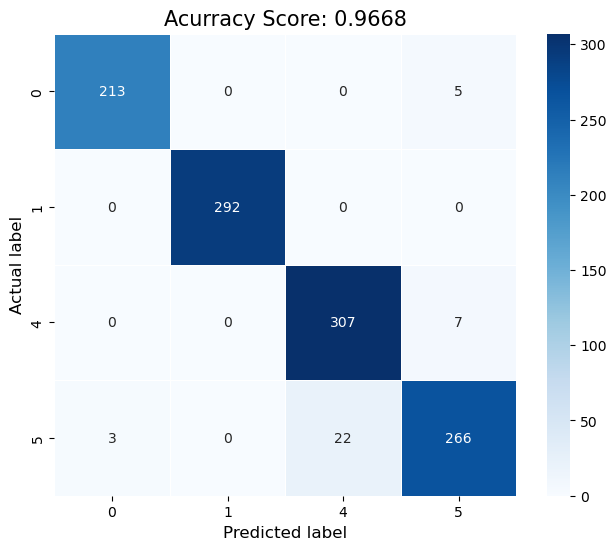

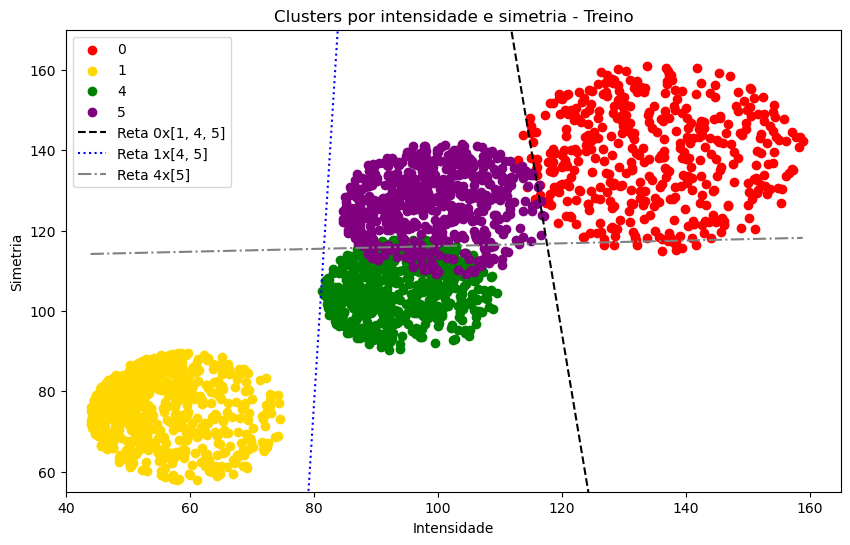

In [5]:
digitos = [0, 1, 4, 5]

Nmin = np.ceil(X_train.shape[0] * 0.5).astype(int)
Nmax = np.ceil(X_train.shape[0] * 1.0).astype(int) 

lr = PocketPLA(25000, Nmin=Nmin, Nmax=Nmax)

modelo = Um_contra_todos(lr, digitos)
modelo.execute(X_train, y_train)
all_w = modelo.get_all_w()
ypred = modelo.predict_digit(X_test)


metrics = Metrics_multiclass(digitos)
metrics.print_metrics_multiclass(y_test, ypred)
plot_classification_digits(new_train_df, digitos, 'Clusters por intensidade e simetria - Treino', W=all_w[:4])

  0%|          | 0/3000000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 3000000/3000000 [07:08<00:00, 6996.63it/s]


---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 0.9049
Error de Classificacao: 0.0951
_______________________________________________________
_______________________________________________________
Precision para digito 0: 0.9864
Recall para digito 0: 0.9954
F1 Score para digito 0: 0.9909
_______________________________________________________
_______________________________________________________
Precision para digito 1: 1.0000
Recall para digito 1: 0.9966
F1 Score para digito 1: 0.9983
_______________________________________________________
_______________________________________________________
Precision para digito 4: 0.9775
Recall para digito 4: 0.6911
F1 Score para digito 4: 0.8097
_______________________________________________________
_______________________________________________________
Precision para digito 5: 0.7435
Recall para digito 5: 0.9759
F1 Score para digito 5: 0.8440
___________

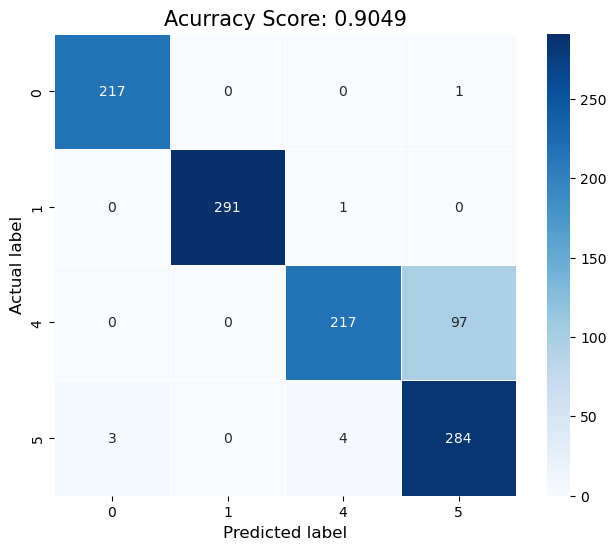

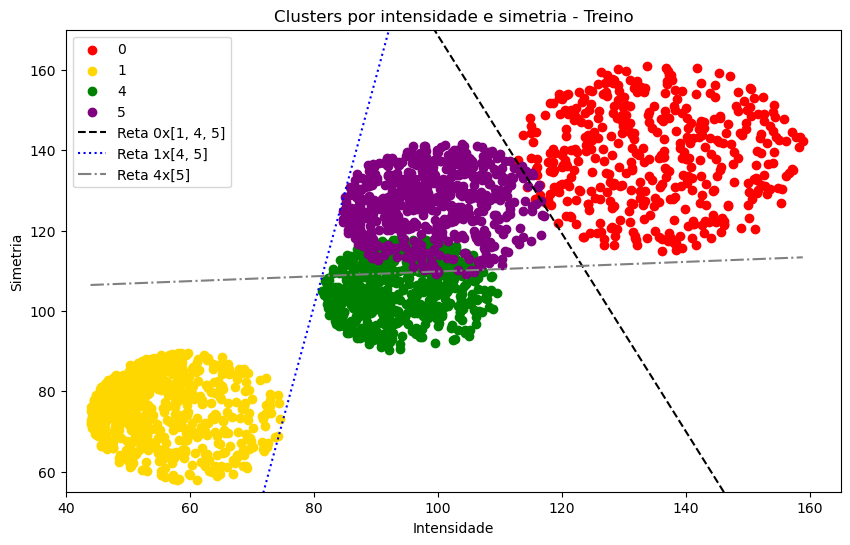

In [6]:
digitos = [0, 1, 4, 5]

lr = LogisticRegression(tmax=3000000, batch_size=128)
modelo = Um_contra_todos(lr, digitos)
modelo.execute(X_train, y_train)
all_w = modelo.get_all_w()
ypred = modelo.predict_digit(X_test)


metrics = Metrics_multiclass(digitos)
metrics.print_metrics_multiclass(y_test, ypred)
plot_classification_digits(new_train_df, digitos, 'Clusters por intensidade e simetria - Treino', W=all_w[:4])

In [7]:
ordens_digitos = [
    [1, 0, 4, 5],
    [1, 4, 0, 5],
    [1, 5, 0, 4],
    [1, 0, 5, 4],
    [1, 4, 5, 0],
    [1, 5, 4, 0],                               
    [0, 1, 4, 5],
    [0, 1, 5, 4],
    [0, 4, 1, 5],
    [0, 4, 5, 1],
    [0, 5, 1, 4],
    [0, 5, 4, 1],
    [4, 1, 0, 5],
    [4, 1, 5, 0],
    [4, 0, 1, 5],
    [4, 0, 5, 1],
    [4, 5, 0, 1],
    [4, 5, 1, 0],
    [5, 1, 0, 4],
    [5, 1, 4, 0],
    [5, 0, 1, 4],
    [5, 0, 4, 1],
    [5, 4, 0, 1],
    [5, 4, 1, 0],
]

0.9614349775784753
[1, 0, 4, 5]


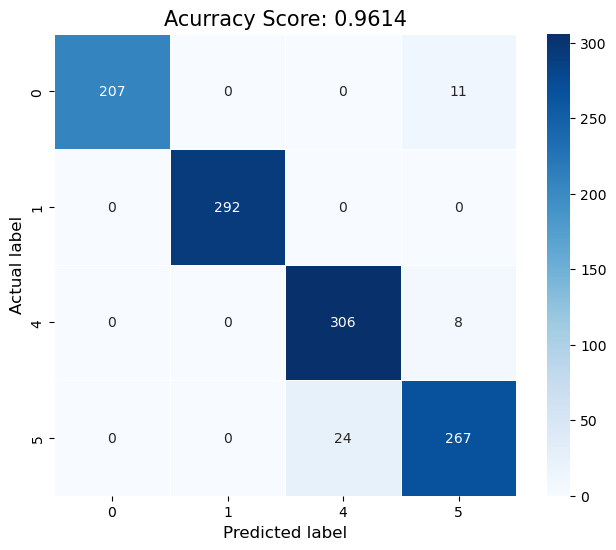

In [8]:
lr = LinearRegression()

best_acc = 0
best_ordem = None
best_all_w = None
best_pred = None

for i, ordem in enumerate(ordens_digitos[:11]):
    modelo = Um_contra_todos(lr, ordem)
    modelo.execute(X_train, y_train)
    all_w = modelo.get_all_w()
    ypred = modelo.predict_digit(X_test)
    acc = accuracy_score(y_test, ypred)
    if acc > best_acc:
        best_acc = acc
        best_ordem = ordem
        best_all_w = all_w
        best_pred = ypred

print(best_acc)
print(best_ordem)
confusion_matrix_plot(y_test, best_pred)

100%|██████████| 30000/30000 [05:57<00:00, 84.00it/s] 


0.9641255605381166
[5, 4, 1, 0]
0.9641255605381166
[5, 4, 1, 0]


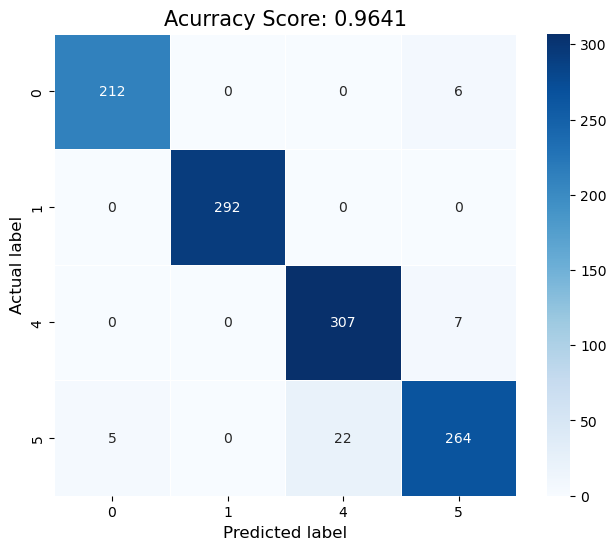

In [9]:
Nmin = np.ceil(X_train.shape[0] * 0.5).astype(int)
Nmax = np.ceil(X_train.shape[0] * 1.0).astype(int)

lr = PocketPLA(30000, Nmin=Nmin, Nmax=Nmax)

best_acc = 0
best_ordem = None
best_all_w = None
best_pred = None
len_ordens = len(ordens_digitos)

for i, ordem in enumerate(ordens_digitos[:11]):
    print(i)
    modelo = Um_contra_todos(lr, ordem)
    modelo.execute(X_train, y_train)
    all_w = modelo.get_all_w()
    y_pred = modelo.predict_digit(X_test)
    acc = accuracy_score(y_test, ypred)
    if acc > best_acc:
        best_acc = acc
        best_ordem = ordem
        best_all_w = all_w
        best_pred = y_pred
        print(best_acc)
        print(best_ordem)

print(best_acc)
print(best_ordem)
confusion_matrix_plot(y_test, best_pred)

In [11]:
lr = LogisticRegression(tmax=300000, batch_size=128)

best_acc = 0
best_ordem = None
best_all_w = None
best_pred = None

for i, ordem in enumerate(ordens_digitos[:11]):
    print(i)
    modelo = Um_contra_todos(lr, ordem)
    modelo.execute(X_train, y_train)
    all_w = modelo.get_all_w()
    ypred = modelo.predict_digit(X_test)
    acc = accuracy_score(y_test, ypred)
    if acc > best_acc:
        best_acc = acc
        best_ordem = ordem
        best_all_w = all_w
        best_pred = ypred
        print(best_acc)
        print(best_ordem)

print(best_acc)
print(best_ordem)
confusion_matrix_plot(y_test, best_pred)

0


100%|██████████| 300000/300000 [00:39<00:00, 7562.40it/s]


0.6663677130044843
[1, 0, 4, 5]
1


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:36<00:00, 8268.29it/s]


0.6852017937219731
[1, 4, 0, 5]
2


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:34<00:00, 8739.06it/s]


0.6923766816143497
[1, 5, 0, 4]
3


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:38<00:00, 7776.44it/s]


0.7255605381165919
[1, 0, 5, 4]
4


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:34<00:00, 8613.21it/s]


5


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:34<00:00, 8579.23it/s]


6


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:40<00:00, 7449.57it/s]


7


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:46<00:00, 6502.53it/s]


8


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:40<00:00, 7322.67it/s]


9


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:40<00:00, 7374.65it/s]


10


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:36<00:00, 8254.14it/s]


11


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:38<00:00, 7807.55it/s]


12


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:35<00:00, 8455.69it/s]


13


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:36<00:00, 8288.42it/s]


14


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:39<00:00, 7565.32it/s]


15


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:40<00:00, 7391.86it/s]


16


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 300000/300000 [00:39<00:00, 7669.50it/s]


17


  0%|          | 0/300000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:106: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch * np.dot(w, X_batch.T).reshape(-1, 1)))
 44%|████▎     | 130634/300000 [00:17<00:23, 7362.12it/s]


KeyboardInterrupt: 

In [ ]:
"""
Melhor ordem digitos
Regressao Linear: [1, 0, 4, 5]
PLA: [1, 0, 4, 5]
Regressao Logistica: [1, 0, 5, 4]
"""